### 📌 **Practical Notebook - AI Problem Solving**
#### **Constraint Satisfaction Problems (CSP), Cryptarithmetic Puzzles, and Adversarial Search**
Amir Mohammad Mahfozi - Arman Tahmasebi

---

# <div align="center">
# <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150>
# <br>
# <font color=0F5298 size=7>
# Artificial Intelligence - Practical Assignment
# </font>
# </div>

---

## **📝 Student Information**
Before starting the assignment, please fill in your details below.

- **Name:** *TODO: Nima Mollaei*
- **Student ID:** *TODO: 402106553*

---

## **🏰 The Kingdom Conflict of Eldoria**
### **📖 Background Story**
The great land of **Eldoria** is composed of multiple **kingdoms**, each ruled by different noble families. Due to historical rivalries and past wars, some kingdoms refuse to be aligned with the same ruling faction. 

Your task is to ensure diplomatic stability by:
1. **Assigning ruling factions (colors) to each kingdom.**
2. **Ensuring that neighboring rival kingdoms do not share the same faction.**
3. **Minimizing the number of different factions used while ensuring fairness.**

This problem is a classic example of a **Constraint Satisfaction Problem (CSP)**, specifically **Graph Coloring**, where:
- Each **kingdom** is a **node** in a graph.
- Each **rivalry** between two kingdoms is an **edge** connecting two nodes.
- Each **ruling faction (color)** is an **assignment** that must follow constraints.

---
### **🔢 Unlocking the Treasure - Cryptarithmetic Puzzles**
After stabilizing Eldoria, you discover an ancient locked **treasure chest** deep within the royal archives.  
The lock is encrypted with a **mathematical puzzle**, and only those skilled in **Cryptarithmetic** can solve it.  
Your mission: **Decode the puzzle** and open the treasure!

---
### **🎮 The Hidden Challenge - Adversarial Search in Othello**
Inside the chest, you find an ancient **board game** that requires strategic thinking. The game is a **version of Othello**,  
and to win, you must design an **intelligent AI agent** using **Adversarial Search techniques** like:
- **Minimax Algorithm**
- **Alpha-Beta Pruning**
- **Expectimax**

Your final task: **Train an AI agent to play and win the game!** 🏆

---
## **🎯 Learning Objectives**
By the end of this assignment, you will:
✅ Understand how **Constraint Satisfaction Problems (CSPs)** work.  
✅ Learn how to solve a **Graph Coloring Problem** using CSP techniques.  
✅ Implement **Backtracking Search** to find valid assignments.  
✅ Solve **Cryptarithmetic Puzzles** with AI techniques.  
✅ Apply **Adversarial Search Algorithms** in strategic decision-making.  

---
## **📌 Instructions**
1. **Read each section carefully** and follow the explanations.
2. Parts of the code are **missing** (marked as `TODO`). You need to **fill them in**.
3. **Run each code cell** after implementing the missing parts.
4. Answer the **questions** provided in some sections.

Let's begin! 🎯


## **Problem Statement: Graph Coloring CSP**
Eldoria is represented as an **undirected graph**, where:
- **Each kingdom is a node**.
- **Each edge signifies a historical conflict** between two kingdoms that refuse to be ruled by the same faction.
- **Your goal is to assign each kingdom a faction (color) while ensuring no two neighboring kingdoms share the same faction.**

### **Input Format:**
- The first line contains an integer $N$ representing the number of **kingdoms**.
- The second line contains an integer $M$ indicating the number of **available factions (colors)**.
- The next $E$ lines each contain two integers $u$ and $v$, representing a conflict between kingdoms $u$ and $v$.


#### **Example Input:**
```
5
3
0 1
0 2
1 3
1 4
3 4
```

### **Output Format:**
- A list where each index represents a kingdom, and the value at that index represents its assigned faction (color).


### **Your Task:**
- Implement the **AC-3 Algorithm** for constraint propagation.
- Use **Minimum Remaining Values (MRV)** and **Least Constraining Value (LCV)** heuristics to optimize the solution.
- Apply **Backtracking Search** to find a valid ruling assignment.

### **Implementation**

#### **Step 1: Load Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy
from collections import deque

np.random.seed(42)

#### **Step 2: Define the Kingdom Conflict Graph**
The function should read from a file.
Store conflict information in a dictionary.
Initialize each kingdom's faction choices.

In [2]:
# Store conflicts and domain constraints
conflicts = {}
factions = {}

# Function to parse input data
def load_kingdom_data(file_path):
    conflicts.clear()
    factions.clear()
    with open(file_path, 'r') as f:
        data = f.readlines()

    global num_kingdoms, num_factions
    num_kingdoms = int(data[0].strip())
    num_factions = int(data[1].strip())

    for i in range(num_kingdoms):
        conflicts[i] = []
        factions[i] = list(range(num_factions))

    for line in data[2:]:
        u, v = map(int, line.strip().split())
        conflicts[u].append(v)
        conflicts[v].append(u)

#### **Step 3: Implement AC-3 Algorithm**
AC-3 (Arc Consistency 3) is used to reduce the domain of choices for each kingdom before backtracking.

📝 TODO: Implement the revise() function
This function should remove invalid faction choices for a kingdom.
It ensures that neighboring kingdoms do not get the same faction.

In [3]:
# TODO: Implement ac3 algorithm
def ac3(variables):

    queue = deque()

    queue.extend((x, y) for x in variables for y in conflicts[x])

    while queue:

        x, y = queue.popleft()
        if revise(x, y):
            if len(factions[x] )< 1:
                return False
            queue.extend((t,x) for t in conflicts[x] if t!=y)

    return True

# TODO: Implement revise function
def revise(x, y):
    """ Removes values from x that are inconsistent with y. """
    revised = False
    tmp_factions = copy.deepcopy(factions)
    for c in factions[x]:
        if all(c == c2 for c2 in factions[y]):  # TODO: Fix constraint check
            revised = True
            tmp_factions[x].remove(c)

    factions.update(tmp_factions)        
    return revised


#### **Step 4: Implement Heuristics - MRV & LCV**
MRV (Minimum Remaining Values) selects the most constrained variable first.
LCV (Least Constraining Value) picks values that minimize conflicts.

In [4]:
# TODO: Implement heuristic functions
def select_unassigned_variable():
    unassigned = [x for x in factions if len(factions[x]) > 1]
    var = unassigned[0]
    for i in range(1, len(unassigned)):
        t = unassigned[i]
        if len(factions[var]) > len(factions[t]):
            var = t
        # elif len(factions[var]) == len(factions[t]):
        #     if len(conflicts[t])>len(conflicts[var]):
        #         var = t
    return var


def order_domain_values(var):
    """ Orders factions based on LCV heuristic. """
    made_constraints = []
    for i in factions[var]:
        constraints = 0
        for neigh in conflicts[var]:
            if i in factions[neigh]:
                constraints += 1
        made_constraints.append(constraints)

    return [x for _, x in sorted(zip(made_constraints, factions[var]))]
    


#### **Step 5: Implement Backtracking Search**
Try assigning a faction to a kingdom.
Use AC-3 to reduce domains.
Revert changes if a failure occurs (backtracking).

In [5]:
# TODO: Implement Backtracking Search
def backtrack():
    """ Uses Backtracking Search to assign factions. """
    if all(len(factions[v]) == 1 for v in factions):
        return {v: factions[v][0] for v in factions}  # Solution found

    var = select_unassigned_variable()
    for value in order_domain_values(var):
        temp_factions = copy.deepcopy(factions)
        factions[var] = [value]

        if ac3(factions):  #TODO: Ensure AC-3 maintains consistency
            result = backtrack()
            if result:
                return result

        factions.update(temp_factions)  # Undo changes (backtracking)
    return None


#### **Step 6: Validate and Test the Implementation**

In [6]:
load_kingdom_data('input0.txt')
solution = backtrack()
print("Kingdom Assignments:", solution)

Kingdom Assignments: {0: 0, 1: 1, 2: 1, 3: 0, 4: 2}


#### **Step 7: Visualize the Solution**

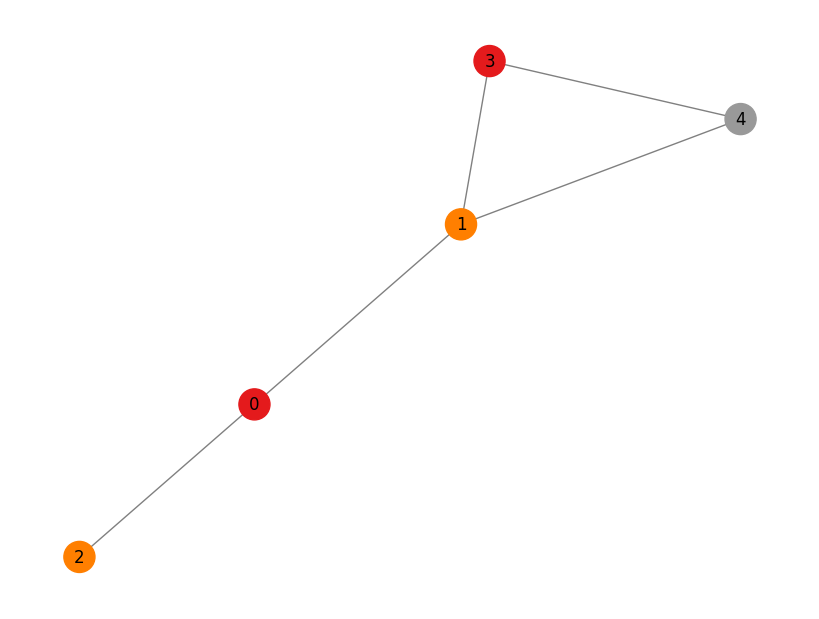

In [7]:
def plot_kingdoms():
    G = nx.Graph()
    for kingdom, neighbors_list in conflicts.items():
        for neighbor in neighbors_list:
            G.add_edge(kingdom, neighbor)

    pos = nx.spring_layout(G)
    factions_map = [solution[node] for node in G.nodes()]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=factions_map, cmap=plt.cm.Set1, edge_color='gray', node_size=500)
    plt.show()

plot_kingdoms()

Kingdom Assignments: {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 2, 6: 0, 7: 1, 8: 0, 9: 2, 10: 2, 11: 2, 12: 1, 13: 1, 14: 0, 15: 2, 16: 0, 17: 1, 18: 0, 19: 2, 20: 0, 21: 1, 22: 0, 23: 2, 24: 0, 25: 1, 26: 0, 27: 2, 28: 0, 29: 1, 30: 0, 31: 2, 32: 0, 33: 1, 34: 0, 35: 1, 36: 0, 37: 1, 38: 0, 39: 1}


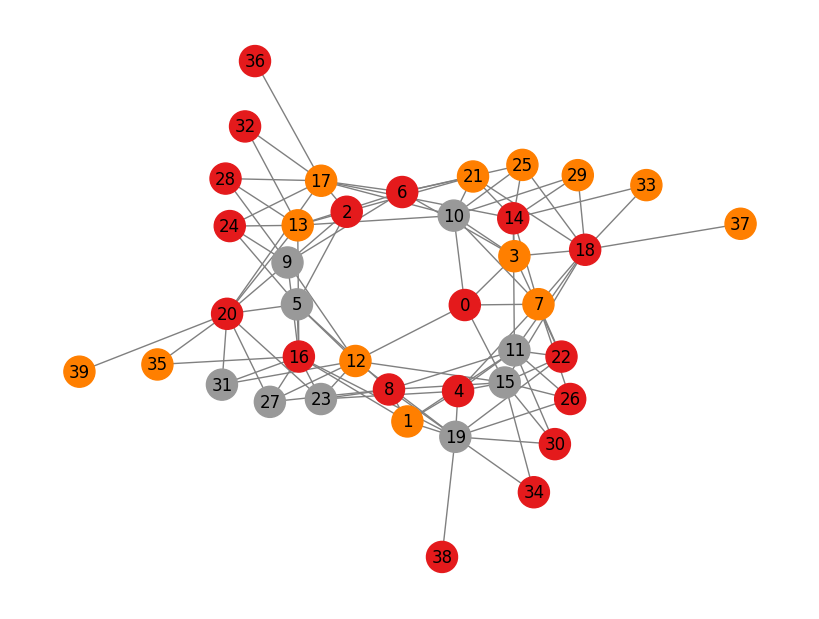

In [8]:
load_kingdom_data('map.txt')
solution = backtrack()
print("Kingdom Assignments:", solution)
plot_kingdoms()

## **Part 2: Unlocking the Treasure (Cryptarithmetic Puzzle CSP)**
### **Background:**
After successfully stabilizing the kingdom, the great vault of Eldoria's lost treasure has been discovered. However, it is **locked with an ancient code** that must be deciphered using a **cryptarithmetic puzzle**. Your task is to crack the code and unlock the treasure!

---

### **Problem Statement: Cryptarithmetic Puzzle**
The treasure chest is locked using a numerical puzzle where **letters represent unique digits (0-9)**. You must assign each letter a unique digit such that the given arithmetic equation holds.

#### **Example Puzzle:**
```
  GOLD
+ COIN
------
  CHEST
```
Each letter corresponds to a distinct digit, and the equation must be mathematically valid.

### **Constraints:**
- Each **letter represents a unique digit** (0-9).
- No two letters can have the **same digit**.
- The sum must be mathematically correct.
- No leading zeros.

---

### **Your Task:**
- Implement **Backtracking Search** to assign digits to letters.
- Use **Minimum Remaining Values (MRV)** and **Least Constraining Value (LCV)** heuristics to optimize the solution.
- Ensure the final assignment satisfies all constraints.

---

### **Implementation**

#### **Step 1: Define the Cryptarithmetic Puzzle**
We need a function to convert a word into a number based on a given letter-digit mapping.

📝 TODO: Implement word_to_number()
Convert a word into a number using the given mapping.
Example: If mapping = {'S': 9, 'E': 5, 'N': 6, 'D': 7},
then "SEND" should convert to 9567.

#### **Step 2: Solve Using Backtracking**
Identify all unique letters.
Generate all possible digit permutations for these letters.
Check each assignment to find a valid solution.

In [ ]:
from collections import defaultdict

def is_valid_assignment(assignments, var, value):
    
    return value not in assignments.values()

def forward_checking(assignments, domain, var, value):
   
    new_domain = {k: v.copy() for k, v in domain.items()}  # Deep copy of domain
    
    for neighbor in new_domain:
        if neighbor not in assignments and value in new_domain[neighbor]:
            new_domain[neighbor].remove(value)
            if not new_domain[neighbor]:
                
                  # If domain is empty, backtrack
                return None  
    return new_domain

def select_unassigned_variable(assignments, domain):
    
    unassigned_vars = [var for var in domain if var not in assignments]
    return min(unassigned_vars, key=lambda v: len(domain[v]))  

def is_solution(assignments, words, result):
    
    words_values = [sum(assignments[char] * (10 ** i) for i, char in enumerate(reversed(word))) for word in words]
    result_value = sum(assignments[char] * (10 ** i) for i, char in enumerate(reversed(result)))
    return sum(words_values) == result_value

def backtrack(assignments, domain, words, result):
   
    if len(assignments) == len(domain):  
        return assignments if is_solution(assignments, words, result) else None

    var = select_unassigned_variable(assignments, domain) 
    
    for value in sorted(domain[var]):  
        if is_valid_assignment(assignments, var, value):
            assignments[var] = value
            new_domain = forward_checking(assignments, domain, var, value)

            if new_domain is not None:  # If forward checking succeeds
                solution = backtrack(assignments, new_domain, words, result)
                if solution:
                    return solution  
                
            del assignments[var]  

    return None

def solve_cryptarithmetic(words, result):
    
    unique_chars = set("".join(words) + result)  # Extract all unique letters
    
    # Ensure valid problem
    if len(unique_chars) > 10:
        return "No solution: More than 10 unique letters."

    # Initialize domain (all digits 0-9)
    domain = {char: set(range(10)) for char in unique_chars}

    # Ensure no leading zeros
    for word in words + [result]:
        domain[word[0]] -= {0}

    solution = backtrack({}, domain, words, result)
    return solution if solution else "No solution found."


#### **Step 3: Run and Display the Solution**

In [10]:
words = ["SEND", "MORE"]
result = "MONEY"
solution = solve_cryptarithmetic(words, result)
print("Solution:", solution if solution else "No solution found")

Solution: {'M': 1, 'S': 9, 'E': 5, 'Y': 2, 'O': 0, 'R': 8, 'N': 6, 'D': 7}


The Final Lock – Unlocking the Treasure Chest
After solving the kingdom conflict puzzle, you finally reach the hidden treasure chest deep inside the ruins of Eldoria. The chest is ancient, covered in golden engravings, and protected by a mystical numerical lock.

As you examine the lock, you notice an inscription:

"Only the sacred word shall reveal the wealth within. Transform the letters into digits, and the treasure shall be yours!"

You recall the ancient texts that spoke of "SERMON", a word of wisdom and power. But the lock requires a six-digit code that matches the letters in the word SERMON.

The final numeric code is:

🔒TODO : 958106

# 📌 **Adversarial Search - Othello AI**
### **Background**
After unlocking the treasure, you find an **ancient AI-driven board game** known as **Othello**!  
The grandmasters of Eldoria challenge you to **build an AI agent** that can **compete against them**.  

Your mission:  
✔ Implement **Minimax**, **Alpha-Beta Pruning**, and **Expectimax** to make your AI **unbeatable**.  
✔ Ensure **the AI follows the rules of Othello** and plays optimally.  

---

## **🛠️ Game Rules**
1. Players take turns placing pieces on an **8x8 board**.
2. A move is valid if it **captures at least one opponent piece**.
3. Captured pieces are **flipped** to the current player’s color.
4. The game **ends when both players have no valid moves**.
5. The player with the **most pieces on the board wins**.

---

## **🎯 Your Task**
- Implement a **valid move function**.
- Implement **Minimax, Alpha-Beta Pruning, and Expectimax** agents.
- Make the AI play **against itself**.

---

## **Step 1: Load Required Libraries**
Below is the game logic there is no need to change anything.

In [11]:
# othello.py
import pygame

# Constants
WIDTH, HEIGHT = 600, 600
GRID_SIZE = 8
CELL_SIZE = WIDTH // GRID_SIZE
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (34, 139, 34)
GRAY = (200, 200, 200)

class Othello:
    def __init__(self):
        self.board = [[' ' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
        self.board[3][3] = self.board[4][4] = 'W'
        self.board[3][4] = self.board[4][3] = 'B'
        self.current_player = 'B'
        self.turn_count = 1

    def is_valid_move(self, row, col):
        if self.board[row][col] != ' ':
            return False
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'
        
        for dr, dc in directions:
            r, c = row + dr, col + dc
            found_opponent = False
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                r += dr
                c += dc
                found_opponent = True
            if found_opponent and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                return True
        return False

    def get_valid_moves(self):
        
        return [(r, c) for r in range(GRID_SIZE) for c in range(GRID_SIZE) if self.is_valid_move(r, c)]

    def make_move(self, row, col):
        if not self.is_valid_move(row, col):
            return False

        self.board[row][col] = self.current_player
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'

        for dr, dc in directions:
            r, c = row + dr, col + dc
            captured = []
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                captured.append((r, c))
                r += dr
                c += dc
            if captured and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                for cr, cc in captured:
                    self.board[cr][cc] = self.current_player

        self.current_player = 'B' if self.current_player == 'W' else 'W'
        self.turn_count += 1
        return True

    def game_over(self):
        """ The game ends only if BOTH players have no valid moves """
        current_moves = self.get_valid_moves()
        
        # Temporarily switch player to check opponent's moves
        self.current_player = 'B' if self.current_player == 'W' else 'W'
        opponent_moves = self.get_valid_moves()
        
        # Switch back to original player
        self.current_player = 'B' if self.current_player == 'W' else 'W'
        
        # Game only ends when BOTH players cannot move
        return len(current_moves) == 0 and len(opponent_moves) == 0


    def get_winner(self):
        black_count = sum(row.count('B') for row in self.board)
        white_count = sum(row.count('W') for row in self.board)
        if black_count > white_count:
            return "Black Wins!"
        elif white_count > black_count:
            return "White Wins!"
        else:
            return "It's a Draw!"


pygame 2.6.1 (SDL 2.28.4, Python 3.13.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


## **Step 2: Implement AI Agents**
TODO: Implement Minimax Agent
Minimax recursively chooses the best move by:

Maximizing its own advantage.
Minimizing the opponent's advantage.
Exploring a tree of possible game states.

In [12]:
# TODO: Implement the Minimax agent
import math
class MinimaxAgent:
    def __init__(self, depth):
        self.depth = depth

    def get_move(self, game):
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        
        move_scores = []
        for move in valid_moves:
            game_copy = copy.deepcopy(game)
            game_copy.make_move(move[0], move[1])
            score = self.minimax(game_copy, self.depth-1, False)  
            move_scores.append((move, score))

        
        move_scores.sort(key=lambda x: -x[1])

     
        top_moves = [m for m, s in move_scores[:min(3, len(move_scores))]]
        
       
        best_move = top_moves[0]


        return best_move

    def maxim(game, valid_moves):
            v = -math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])

                v = max(v, self.minimax(game_copy, self.depth-1, not maximizing_player))
            return v
    def minim(game, valid_moves):
            v = math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])

                v = min(v, self.minimax(game_copy, self.depth-1, not maximizing_player))
            return v
            
    def minimax(self, game, depth, maximizing_player):




        


        valid_moves = game.get_valid_moves()

        if depth == 0:
            white_pieces = sum(row.count('W') for row in game.board)
            black_pieces = sum(row.count('B') for row in game.board)
            corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
            
            black_corner_count = sum(game.board[x][y] == 'B' for x, y in corners)
            white_corner_count = sum(game.board[x][y] == 'W' for x, y in corners)

            evaluation = (black_pieces - white_pieces) + 10 * (black_corner_count - white_corner_count)
            if game.current_player == 'B':
                return evaluation
            return -evaluation


        if not valid_moves:
            return self.minimax(game, depth - 1, not maximizing_player)
        if maximizing_player:
            v = -math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])

                v = max(v, self.minimax(game_copy, depth-1, not maximizing_player))
            return v
        else:
            v = math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])

                v = min(v, self.minimax(game_copy, depth-1, not maximizing_player))
            return v
            

     
    
 

📝 TODO: Implement Alpha-Beta Pruning
Alpha-Beta Pruning optimizes Minimax by eliminating unnecessary branches.

In [13]:
# TODO: Implement Alpha-Beta Pruning
class AlphaBetaAgent:
    def __init__(self, depth):
        self.depth = depth

    def get_move(self, game):
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        
        move_scores = []
        for move in valid_moves:
            game_copy = copy.deepcopy(game)
            game_copy.make_move(move[0], move[1])
            score = self.alpha_beta(game_copy,self.depth-1,-math.inf,math.inf, False)  
            move_scores.append((move, score))

        
        move_scores.sort(key=lambda x: -x[1])

     
        top_moves = [m for m, s in move_scores[:min(3, len(move_scores))]]
        
       
        best_move = top_moves[0]


        return best_move

    def alpha_beta(self, game, depth, alpha, beta, maximizing_player):
        if depth == 0:
            white_pieces = sum(row.count('W') for row in game.board)
            black_pieces = sum(row.count('B') for row in game.board)
            corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
            
            black_corner_count = sum(game.board[x][y] == 'B' for x, y in corners)
            white_corner_count = sum(game.board[x][y] == 'W' for x, y in corners)

            evaluation = (black_pieces - white_pieces) + 10 * (black_corner_count - white_corner_count)
            if game.current_player == 'B':
                return evaluation
            return -evaluation
        
        def minim(game, valid_moves,alpha,beta):
            v = math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                v = min(v, self.alpha_beta(game_copy, depth-1, alpha, beta, not maximizing_player))
                if v<=alpha:
                    return v
                
                beta = min(beta, v)
            return v
        def maxim(game, valid_moves, alpha, beta):
            v = -math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                v = max(v, self.alpha_beta(game_copy, depth-1,alpha,beta, not maximizing_player))
                if v>=beta:
                    return v
                alpha = max(alpha, v)
            return v
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return self.alpha_beta(game, depth - 1,alpha, beta, not maximizing_player)
        if maximizing_player:
            return maxim(game, valid_moves, alpha, beta)
        else:
            return minim(game, valid_moves, alpha, beta)
        

📝 TODO: Implement Expectimax Agent
Expectimax is used when the opponent’s move is not optimal and follows a probabilistic strategy.

In [ ]:
# TODO: Implement Expectimax Agent
import random
class ExpectimaxAgent:
    def __init__(self, depth):
        self.depth = depth
       
    def get_move(self, game):
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        
        move_scores = []
        for move in valid_moves:
            game_copy = copy.deepcopy(game)
            game_copy.make_move(move[0], move[1])
            score = self.expectimax(game_copy, min(self.depth-1, 2), False)  
            move_scores.append((move, score))

        
        move_scores.sort(key=lambda x: -x[1])

     
        top_moves = [m for m, s in move_scores[:min(3, len(move_scores))]]
        
       
        best_move = top_moves[0]


        return best_move
    
    def expectimax(self, game, depth, maximizing_player):
       
        # Termination check
        if depth == 0 or game.game_over():
            return self.evaluate(game)
        
        # Get possible actions
        moves_available = game.get_valid_moves()
        
        # No moves handler
        if not moves_available:
            temp_game_state = copy.deepcopy(game)
            temp_game_state.current_player = 'W' if temp_game_state.current_player == 'B' else 'B'
            return self.expectimax(temp_game_state, depth-1, not maximizing_player)
        
        if maximizing_player:
            best_so_far = -math.inf  # Ridiculously large negative number
            for action in moves_available:
                game_clone = copy.deepcopy(game)
                game_clone.make_move(action[0], action[1])
                calculated_number = self.expectimax(game_clone, depth-1, False)
                if calculated_number > best_so_far:
                    best_so_far = calculated_number
            return best_so_far
        else:
            accumulated_score = 0.0
            how_many = 0
            for possible_move in moves_available:
                duplicated_game = copy.deepcopy(game)
                duplicated_game.make_move(possible_move[0], possible_move[1])
                accumulated_score += self.expectimax(duplicated_game, depth-1, True)
                how_many += 1
            return accumulated_score / how_many if how_many != 0 else 0

    def evaluate(self, game):
        # Count pieces
        dark = 0
        light = 0
        for row in game.board:
            dark += row.count('B')
            light += row.count('W')
        
        # Corner stuff
        important_squares = [(0,0), (0,7), (7,0), (7,7)]
        dark_corners = 0
        light_corners = 0
        for (x,y) in important_squares:
            if game.board[x][y] == 'B':
                dark_corners += 1
            elif game.board[x][y] == 'W':
                light_corners += 1
        
        # Who can move more
        current_can_move = len(game.get_valid_moves())
        # Switch player
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        other_can_move = len(game.get_valid_moves())
        # Switch back
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        
        # Calculate final number
        result = (dark - light)
        result += 15 * (dark_corners - light_corners)
        result += 5 * (current_can_move - other_can_move)
        
        return result if game.current_player == 'B' else -result
    


You can use the code below to initiate an agent and play with yourself

In [ ]:
# main.py
import pygame

# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Othello Game")

# Load game instance
game = Othello()

# Choose AI agent (Modify as needed)
agent = MinimaxAgent(depth=4)
agent = AlphaBetaAgent(depth=6)  # Using Alpha-Beta Pruning
# agent = ExpectimaxAgent(depth=4)

def draw_board(screen, game):
    """ Draws the Othello board and pieces """
    screen.fill((34, 139, 34))  # Green background
    for i in range(9):  # Grid lines
        pygame.draw.line(screen, (0, 0, 0), (i * 75, 0), (i * 75, 600))
        pygame.draw.line(screen, (0, 0, 0), (0, i * 75), (600, i * 75))

    # Draw pieces
    for r in range(8):
        for c in range(8):
            if game.board[r][c] == 'B':
                pygame.draw.circle(screen, (0, 0, 0), (c * 75 + 37, r * 75 + 37), 30)
            elif game.board[r][c] == 'W':
                pygame.draw.circle(screen, (255, 255, 255), (c * 75 + 37, r * 75 + 37), 30)

    # Display turn count
    font = pygame.font.Font(None, 36)
    turn_text = font.render(f"Turn: {game.turn_count}", True, (255, 255, 255))
    screen.blit(turn_text, (10, 10))
    
    pygame.display.flip()

# Game loop
running = True
while running:
    draw_board(screen, game)  # Update board graphics each frame

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN and game.current_player == 'B':
            x, y = pygame.mouse.get_pos()
            row, col = y // 75, x // 75
            if (row, col) in game.get_valid_moves():
                game.make_move(row, col)
        elif game.current_player == 'W':  # AI's turn
            ai_move = agent.get_move(game)
            if ai_move:
                game.make_move(*ai_move)

    if game.game_over():
        print("Game Over! Winner:", game.get_winner())
        pygame.time.delay(3000)
        running = False

pygame.quit()

you can use this code to make two agents play each other

In [16]:
# main.py
import pygame

# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Othello AI vs AI")

# Load game instance
game = Othello()

# Choose AI agents (Modify as needed)
ai_player_B = AlphaBetaAgent(depth=6)  # AI controlling Black pieces
ai_player_W = ExpectimaxAgent(depth=4)  # AI controlling White pieces
sys.setrecursionlimit(30000)
def draw_board(screen, game):
    """ Draws the Othello board and pieces """
    screen.fill((34, 139, 34))  # Green background
    for i in range(9):  # Grid lines
        pygame.draw.line(screen, (0, 0, 0), (i * 75, 0), (i * 75, 600))
        pygame.draw.line(screen, (0, 0, 0), (0, i * 75), (600, i * 75))

    # Draw pieces
    for r in range(8):
        for c in range(8):
            if game.board[r][c] == 'B':
                pygame.draw.circle(screen, (0, 0, 0), (c * 75 + 37, r * 75 + 37), 30)
            elif game.board[r][c] == 'W':
                pygame.draw.circle(screen, (255, 255, 255), (c * 75 + 37, r * 75 + 37), 30)

    # Display turn count
    font = pygame.font.Font(None, 36)
    turn_text = font.render(f"Turn: {game.turn_count}", True, (255, 255, 255))
    screen.blit(turn_text, (10, 10))
    
    pygame.display.flip()

# AI vs AI Game Loop
running = True
while running:
    pygame.event.pump()  # ✅ This prevents the game from freezing when clicked
    draw_board(screen, game)  # Update board graphics each frame

    if game.game_over():
        print("Game Over! Winner:", game.get_winner())
        pygame.time.delay(3000)
        break

    # Check if the current player has valid moves
    valid_moves = game.get_valid_moves()
    
    if not valid_moves:  
        # If no valid moves, skip the turn
        print(f"No valid moves for {game.current_player}. Skipping turn.")
        game.current_player = 'B' if game.current_player == 'W' else 'W'
        continue  # Restart loop without making a move

    # AI makes its move
    pygame.time.delay(500)  # Small delay for better visualization
    if game.current_player == 'B':
        ai_move = ai_player_B.get_move(game)
    else:
        ai_move = ai_player_W.get_move(game)
    
    if ai_move:
        game.make_move(*ai_move)

pygame.quit()


Game Over! Winner: Black Wins!
